## Support Vector Machine

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

### Loading CSV File

In [3]:
data=pd.read_csv('KS.csv')


In [4]:
pd.options.display.max_rows=100
data.head(100)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
5,1.020,5.27,668,25.3,252,3.34,0
6,1.012,5.62,461,17.4,195,1.40,0
7,1.029,5.67,1107,35.9,550,8.48,0
8,1.015,5.41,543,21.9,170,1.16,0
9,1.021,6.13,779,25.7,382,2.21,0


### Let's Know the shape of our Dataset

In [5]:
data.shape

(316, 7)

### Let's Know our Columns

In [6]:
data.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

### Let's seperate data

In [7]:
features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
target=['target']

In [8]:
x=data[features]
y=data[target]

### Let's Split and Train Data

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=32)

In [10]:
svm= SVC()
svm.fit(x_train,y_train)

SVC()

In [11]:
y_prediction=svm.predict(x_test)

### Accuracy Score

In [12]:
Accuracy_Score= accuracy_score(y_test,y_prediction)
print('The Accuracy Score is :',Accuracy_Score)

The Accuracy Score is : 0.5894736842105263


### Confusion matrix

In [13]:
confusion_matrix(y_test,y_prediction)

array([[39, 15],
       [24, 17]], dtype=int64)

### Plot Confusion Matrix

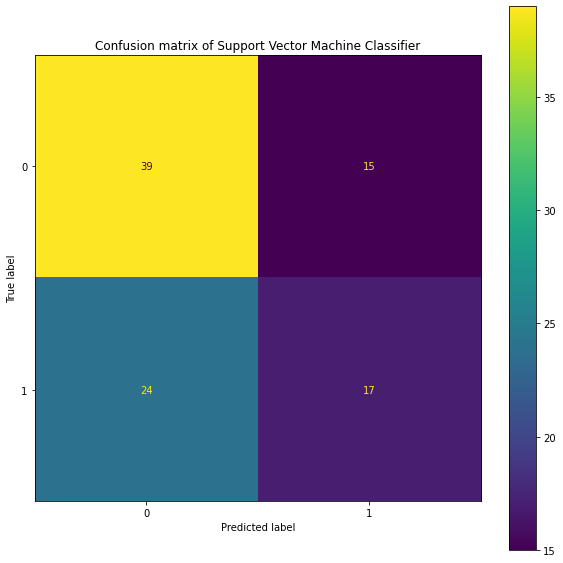

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(svm, x_test, y_test, ax=ax)
plt.title('Confusion matrix of Support Vector Machine Classifier')
plt.show()

### Classification Report

In [15]:
classification_Report= classification_report(y_test,y_prediction)
print(classification_Report)

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        54
           1       0.53      0.41      0.47        41

    accuracy                           0.59        95
   macro avg       0.58      0.57      0.57        95
weighted avg       0.58      0.59      0.58        95



Test size is :  95
random state :  1
Accuracy:  80
Test size is :  96
random state :  1
Accuracy:  80
Test size is :  97
random state :  3
Accuracy:  80
Test size is :  98
random state :  3
Accuracy:  80
Test size is :  99
random state :  3
Accuracy:  80
Test size is :  100
random state :  3
Accuracy:  80
Test size is :  101
random state :  16
Accuracy:  80
Test size is :  102
random state :  35
Accuracy:  80
Test size is :  103
random state :  35
Accuracy:  83
Test size is :  104
random state :  29
Accuracy:  80
Test size is :  105
random state :  35
Accuracy:  83
Test size is :  106
random state :  5
Accuracy:  80
Test size is :  107
random state :  16
Accuracy:  80
Test size is :  108
random state :  16
Accuracy:  80
Test size is :  109
random state :  16
Accuracy:  80
Test size is :  110
random state :  16
Accuracy:  80
Test size is :  111
random state :  16
Accuracy:  81
Test size is :  112
random state :  16
Accuracy:  82
Test size is :  113
random state :  16
Accuracy:  82
Test 

Test size is :  256
random state :  5
Accuracy:  81
Test size is :  257
random state :  2
Accuracy:  80
Test size is :  258
random state :  5
Accuracy:  81
Test size is :  259
random state :  5
Accuracy:  81
Test size is :  260
random state :  5
Accuracy:  81
Test size is :  261
random state :  5
Accuracy:  81
Test size is :  262
random state :  2
Accuracy:  80
Test size is :  263
random state :  2
Accuracy:  82
Test size is :  264
random state :  5
Accuracy:  81
Test size is :  265
random state :  2
Accuracy:  82
Test size is :  266
random state :  2
Accuracy:  81
Test size is :  267
random state :  2
Accuracy:  83
Test size is :  268
random state :  2
Accuracy:  82
Test size is :  269
random state :  2
Accuracy:  82
Test size is :  270
random state :  2
Accuracy:  81
Test size is :  271
random state :  2
Accuracy:  81
Test size is :  272
random state :  2
Accuracy:  80
Test size is :  273
random state :  2
Accuracy:  81
Test size is :  274
random state :  2
Accuracy:  80
Test size is

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0